In [34]:
import joblib
import pandas as pd
import re
import wordcloud as wc
from gensim.parsing.preprocessing import preprocess_string

import pandas as pd
from gensim import corpora, models, parsing
import numpy as np
import copy
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_tags,strip_punctuation,strip_multiple_whitespaces, strip_numeric,remove_stopwords,strip_short, stem_text

#from gensim.utils import simple_preprocess
import nltk
from nltk.stem import WordNetLemmatizer 
#nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import pymorphy2
from pymorphy2 import MorphAnalyzer
import operator
from operator import itemgetter

unable to import 'smart_open.gcs', disabling that module


In [3]:
### GET model ###
model = joblib.load('SGDClassifier_to_ts.pkl') 

In [38]:
#### GET DICT ####
loaded_dict = corpora.Dictionary.load('dictionary')

In [ ]:
#### GET data #######
data_to_pred = pd.read_excel('./input/14_21_june.xlsx') 

In [67]:
from preproc import pipeline_text_to_norm
from to_vect import as_sparse_matrix


In [4]:
# 1. to_norm
%%time
texts = data_to_pred['Комментарий к инциденту']
res = pipeline_text_to_norm(texts)

In [40]:
# 2.  TF-IDF по документам
import gensim
corpus = res
lexicon = loaded_dict
tfidf = gensim.models.TfidfModel(dictionary = lexicon, normalize = True)
vectors = [tfidf[lexicon.doc2bow(doc)] for doc in corpus]

In [42]:
# 3. to_vect
test_vec = as_sparse_matrix(loaded_dict,vectors)

In [43]:
# inf
y_pred = model.predict(test_vec)

In [45]:
y_pred[0:100]

array([ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0, 29, 15, 25,  0,  0, 13,
        0, 24, 29,  0,  0,  0, 24,  0,  0, 24, 17, 25, 15,  0,  0, 13,  0,
        0,  0, 26, 29, 24,  0, 17,  0,  0, 24,  8,  9, 12, 15, 12,  0, 17,
        9,  8,  0,  0,  0,  0,  0, 17, 13, 12, 17, 17,  0,  0, 12,  0, 17,
       16, 17, 17, 17, 15, 22,  0,  0, 14, 17,  0, 17,  0,  0, 29, 18,  0,
        0, 17,  0,  0, 17, 26, 17, 13, 17,  6, 29,  0,  0,  0, 17])

In [ ]:
###### VISUAL TSNE ##########

In [93]:
import numpy as np
from sklearn.manifold import TSNE

X = test_vec
X_embedded = TSNE(n_components=2, perplexity=10).fit_transform(X)
X_embedded.shape

(2458, 2)

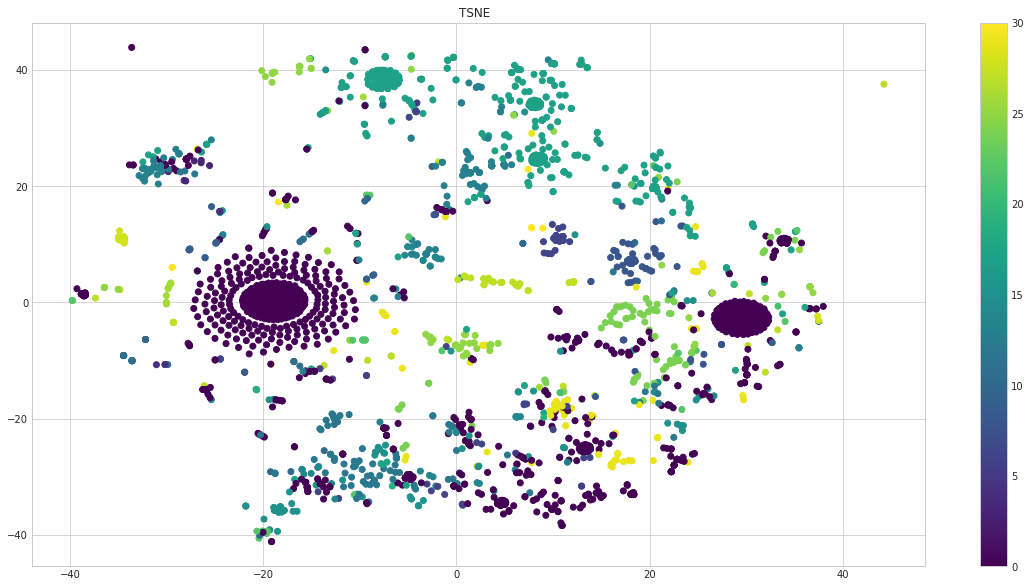

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.style.use('seaborn-whitegrid')
#plt.plot(X_embedded[:,0],X_embedded[:,1], marker = 'o',color = 'g', ls = '')
plt.scatter(X_embedded[:,0],X_embedded[:,1], marker = 'o', c = y_pred.tolist(),cmap='viridis', ls = '-')
plt.title('TSNE  ')
plt.colorbar()

# # # C лейблом
# for x,y,y_test_point in zip(X_embedded[:,0],X_embedded[:,1],y_test):
#     label = "{:.2f}".format(y_test_point)

#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center
#### C индексом
# for index,tr in enumerate(zip(X_embedded[:,0],X_embedded[:,1],y_pred)):
#     if tr[2] == 0:
#         #label = "{:.2f}".format(tr[2],index)
#         label = "{:.2f}".format(index)

#         plt.annotate(label, # this is the text
#                  (tr[0],tr[1]), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center